# Feature Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

## Videos and Interactions

In [6]:
df = pd.read_csv("interactions_1.csv", sep=',')
df

,Unnamed: 0,userId,videoId,appUser,videoDaysSinceUpload,timeZone,visitNumber,hourOfDay,totalSecondsSpent,year,...,FFA_CREATED_AT,FFA_UPDATED_AT,APP,WEB,subscriptor,timeDecay,club,matches.1,originals.1,players.1
0,23,barcafans-00a26277-3e43-4a03-960b-dbbbd494297c,2001120,1,3,1.0,34,0.0,180,2021,...,1.591154e+09,1.613725e+09,0,1,1,1.0,0.0,0.0,0.0,1.0
1,24,barcafans-00a26277-3e43-4a03-960b-dbbbd494297c,2001120,1,3,1.0,34,0.0,14,2021,...,1.591154e+09,1.613725e+09,0,1,1,1.0,0.0,0.0,0.0,1.0
2,25,barcafans-00a26277-3e43-4a03-960b-dbbbd494297c,2001120,1,3,1.0,34,0.0,18,2021,...,1.591154e+09,1.613725e+09,0,1,1,1.0,0.0,0.0,0.0,1.0
3,26,barcafans-00a26277-3e43-4a03-960b-dbbbd494297c,2001120,1,3,1.0,34,0.0,3,2021,...,1.591154e+09,1.613725e+09,0,1,1,1.0,0.0,0.0,0.0,1.0
4,27,barcafans-00a26277-3e43-4a03-960b-dbbbd494297c,2001120,1,3,1.0,34,0.0,5,2021,...,1.591154e+09,1.613725e+09,0,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64731,369316,barcafans-a8190100-7b7c-404b-8c46-664b08bfb7fd,2047460,1,0,1.0,25,23.0,351,2021,...,1.591145e+09,1.609583e+09,0,1,1,1.0,1.0,0.0,0.0,0.0
64732,369318,barcafans-a8190100-7b7c-404b-8c46-664b08bfb7fd,2045864,1,1,1.0,25,23.0,1,2021,...,1.591145e+09,1.609583e+09,0,1,1,1.0,0.0,1.0,0.0,0.0
64733,369319,barcafans-a8190100-7b7c-404b-8c46-664b08bfb7fd,2045864,1,1,1.0,25,23.0,96,2021,...,1.591145e+09,1.609583e+09,0,1,1,1.0,0.0,1.0,0.0,0.0
64734,369320,barcafans-a8190100-7b7c-404b-8c46-664b08bfb7fd,2045864,1,1,1.0,25,23.0,2,2021,...,1.591145e+09,1.609583e+09,0,1,1,1.0,0.0,1.0,0.0,0.0


In [7]:
df.groupby(["on demand"]).size()

on demand
0      664
1    64072
dtype: int64

In [8]:
df.dtypes

Unnamed: 0                int64
userId                   object
videoId                   int64
appUser                   int64
videoDaysSinceUpload      int64
                         ...   
timeDecay               float64
club                    float64
matches.1               float64
originals.1             float64
players.1               float64
Length: 237, dtype: object

# **Videos**

In [9]:
video_columns = ['videoId',
'videoDaysSinceUpload',
#'visits',
'videoDuration',
#'live',
#'on demand',
#'streaming',
'obert',
'paid',
'registre',
'originals.1',
'matches.1',
'players.1',
'club',
'timeDecay',
#'alerts',
#'basquet',
#'btvplus',
#'fans',
#'futbol',
#'futsal',
#'handbol',
#'home',
#'hoquei patins',
#'more',
#'video',
#'welcome',
#'welcome / more',
#'femeni',
#'barca b',
#'moreteams',
#'matches',
#'originals',
#'players',
#'primer equip',
#'contingut estatic',
#'galeria fotos',
#'match center',
#'noticia',
#'videos',
]
df_videos = df[video_columns]
df_videos = df_videos.drop_duplicates()
print(df_videos.count())
print(df_videos.shape)
df_videos = df_videos.dropna()
print(df_videos.shape)
df_videos[:40]

videoId                 3373
videoDaysSinceUpload    3373
videoDuration           3373
obert                   3373
paid                    3373
registre                3373
originals.1             2538
matches.1               2538
players.1               2538
club                    2538
timeDecay               2538
dtype: int64
(3373, 11)
(2538, 11)


,videoId,videoDaysSinceUpload,videoDuration,obert,paid,registre,originals.1,matches.1,players.1,club,timeDecay
0,2001120,3,362,0,1,0,0.0,0.0,1.0,0.0,1.0
7,2007012,0,90,0,0,1,0.0,1.0,0.0,0.0,1.0
12,2001906,2,1487,0,1,0,1.0,0.0,0.0,0.0,0.0
20,2007078,0,164,0,0,1,0.0,1.0,0.0,0.0,1.0
21,2008579,0,58,0,0,1,0.0,0.0,1.0,0.0,1.0
24,2014087,0,304,0,0,1,0.0,1.0,0.0,0.0,1.0
26,2014276,0,288,0,1,0,0.0,1.0,0.0,0.0,1.0
27,1949424,48,92,0,0,1,0.0,1.0,0.0,0.0,1.0
33,2020521,0,94,0,0,1,0.0,1.0,0.0,0.0,1.0
41,2028052,0,95,0,0,1,0.0,1.0,0.0,0.0,1.0


In [10]:
df_videos

,videoId,videoDaysSinceUpload,videoDuration,obert,paid,registre,originals.1,matches.1,players.1,club,timeDecay
0,2001120,3,362,0,1,0,0.0,0.0,1.0,0.0,1.0
7,2007012,0,90,0,0,1,0.0,1.0,0.0,0.0,1.0
12,2001906,2,1487,0,1,0,1.0,0.0,0.0,0.0,0.0
20,2007078,0,164,0,0,1,0.0,1.0,0.0,0.0,1.0
21,2008579,0,58,0,0,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64550,2030550,13,5879,0,1,0,0.0,1.0,0.0,0.0,0.0
64560,2029995,13,170,0,0,1,0.0,1.0,0.0,0.0,1.0
64626,2038990,7,194,1,0,0,0.0,1.0,0.0,0.0,1.0
64657,2001063,25,426,0,0,1,0.0,0.0,1.0,0.0,1.0


,videoId,videoDaysSinceUpload,videoDuration,obert,paid,registre,originals.1,matches.1,players.1,club,timeDecay
videoId,1.000000,-0.630102,-0.284597,0.028288,-0.148635,0.137605,-0.124777,0.149476,-0.045308,0.073789,0.347834
videoDaysSinceUpload,-0.630102,1.000000,0.112759,-0.089199,0.207593,-0.166074,0.221637,-0.405198,0.215743,-0.084814,-0.444605
videoDuration,-0.284597,0.112759,1.000000,-0.131944,0.454290,-0.396674,0.121546,0.168997,-0.293322,-0.008098,-0.445213
obert,0.028288,-0.089199,-0.131944,1.000000,-0.304660,-0.213024,-0.097544,-0.089924,0.153780,0.067163,0.065800
paid,-0.148635,0.207593,0.454290,-0.304660,1.000000,-0.865699,0.274325,-0.162556,-0.118573,0.050813,-0.373768
registre,0.137605,-0.166074,-0.396674,-0.213024,-0.865699,1.000000,-0.230142,0.214012,0.040815,-0.087422,0.348835
originals.1,-0.124777,0.221637,0.121546,-0.097544,0.274325,-0.230142,1.000000,-0.486655,-0.242857,-0.060760,-0.385563
matches.1,0.149476,-0.405198,0.168997,-0.089924,-0.162556,0.214012,-0.486655,1.000000,-0.590938,-0.147847,0.517040
players.1,-0.045308,0.215743,-0.293322,0.153780,-0.118573,0.040815,-0.242857,-0.590938,1.000000,-0.073780,-0.227802
club,0.073789,-0.084814,-0.008098,0.067163,0.050813,-0.087422,-0.060760,-0.147847,-0.073780,1.000000,0.156720


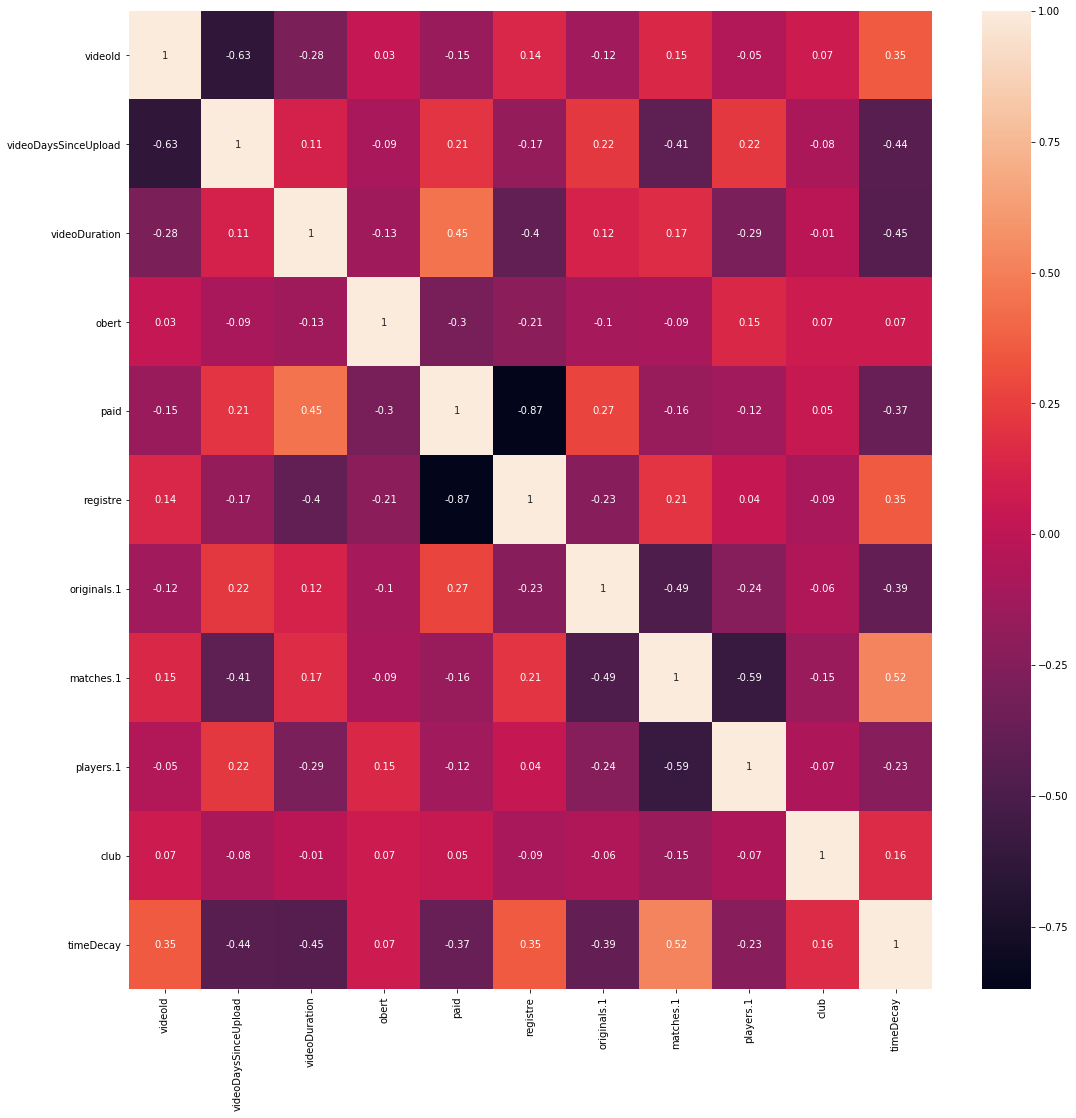

In [11]:
plt.figure(figsize=(18, 18))
sns.heatmap(round(df_videos.corr(), 2), annot=True)
df_videos.corr()

The strongly related attributes (> 70%) are:

videoDuration -> live, on demand

on demand -> live (they are part of a one-hot vector and override each other)

register -> paid (they are part of a one-hot vector and practically cancel each other out)


In [17]:
video_columns = ['videoId',
'videoDaysSinceUpload',
#'visits',
'videoDuration',
#'live',
#'on demand',
#'streaming',
'obert',
'paid',
#'originals.1',
'matches.1',
'players.1',
#'club',
#'timeDecay',
#'registre',
#'alerts',
#'basquet',
#'btvplus',
#'fans',
#'futbol',
#'futsal',
#'handbol',
#'home',
#'hoquei patins',
#'more',
#'video',
#'welcome',
#'welcome / more',
#'femeni',
#'barca b',
#'moreteams',
#'matches',
#'originals',
#'players',
#'primer equip',
#'contingut estatic',
#'galeria fotos',
#'match center',
#'noticia',
#'videos'
]
df_videos_clean = df_videos[video_columns]

,videoId,videoDaysSinceUpload,videoDuration,obert,paid,matches.1,players.1
videoId,1.000000,-0.630102,-0.284597,0.028288,-0.148635,0.149476,-0.045308
videoDaysSinceUpload,-0.630102,1.000000,0.112759,-0.089199,0.207593,-0.405198,0.215743
videoDuration,-0.284597,0.112759,1.000000,-0.131944,0.454290,0.168997,-0.293322
obert,0.028288,-0.089199,-0.131944,1.000000,-0.304660,-0.089924,0.153780
paid,-0.148635,0.207593,0.454290,-0.304660,1.000000,-0.162556,-0.118573
matches.1,0.149476,-0.405198,0.168997,-0.089924,-0.162556,1.000000,-0.590938
players.1,-0.045308,0.215743,-0.293322,0.153780,-0.118573,-0.590938,1.000000


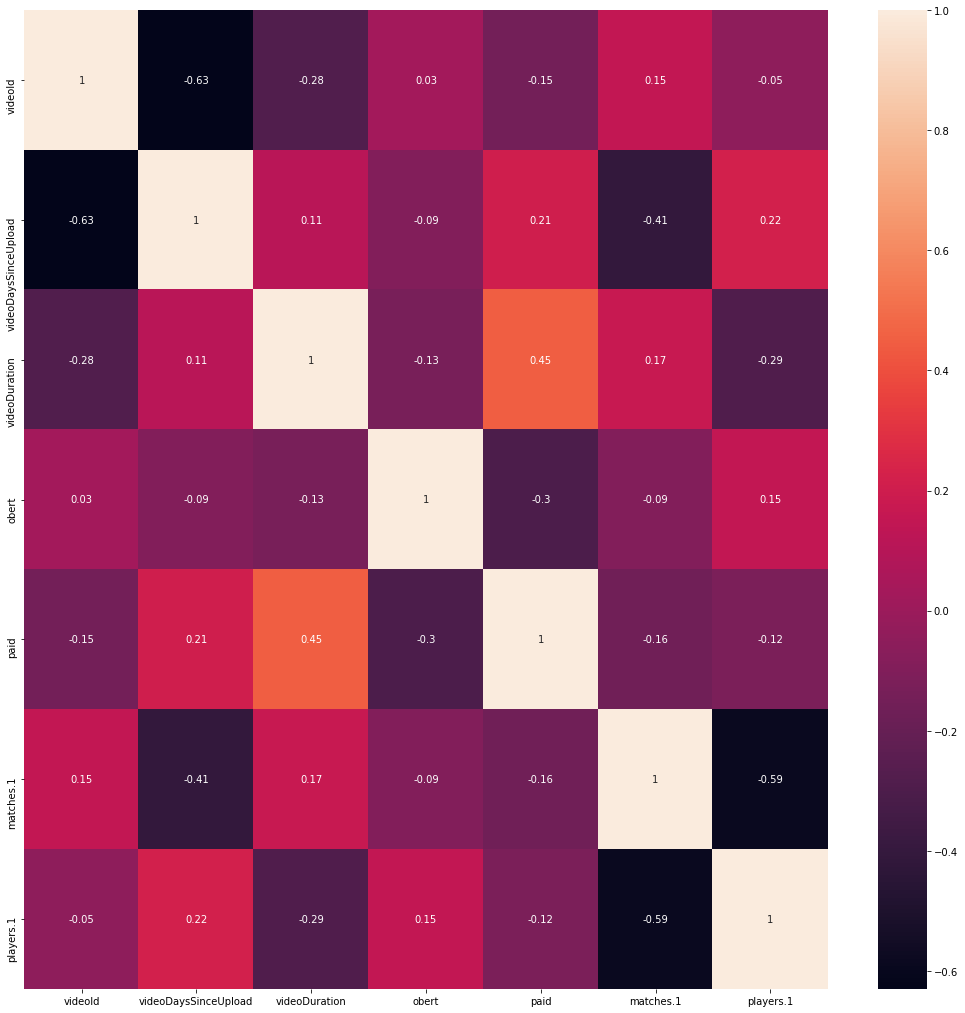

In [18]:
plt.figure(figsize=(18, 18))
sns.heatmap(round(df_videos_clean.corr(), 2), annot=True)
df_videos_clean.corr()

In [19]:
df_videos_clean.describe()

,videoId,videoDaysSinceUpload,videoDuration,obert,paid,matches.1,players.1
count,2.538000e+03,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,1.846635e+06,84.654058,1607.940898,0.069740,0.553191,0.542159,0.227738
std,2.850991e+05,101.988407,2146.118004,0.254758,0.497261,0.498318,0.419456
min,7.110110e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.722276e+06,5.000000,182.000000,0.000000,0.000000,0.000000,0.000000
50%,1.968118e+06,30.000000,547.000000,0.000000,1.000000,1.000000,0.000000
75%,2.014597e+06,142.750000,2406.000000,0.000000,1.000000,1.000000,0.000000
max,2.047460e+06,299.000000,8958.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_videos_clean

,videoId,videoDaysSinceUpload,videoDuration,obert,paid,matches.1,players.1
0,2001120,3,362,0,1,0.0,1.0
7,2007012,0,90,0,0,1.0,0.0
12,2001906,2,1487,0,1,0.0,0.0
20,2007078,0,164,0,0,1.0,0.0
21,2008579,0,58,0,0,0.0,1.0
...,...,...,...,...,...,...,...
64550,2030550,13,5879,0,1,1.0,0.0
64560,2029995,13,170,0,0,1.0,0.0
64626,2038990,7,194,1,0,1.0,0.0
64657,2001063,25,426,0,0,0.0,1.0


In [22]:
seed = 42

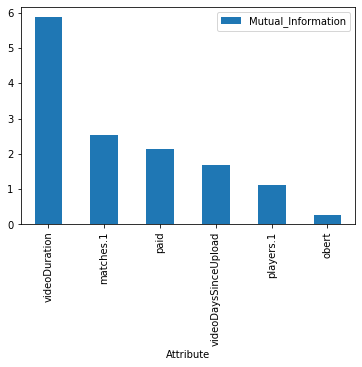

In [23]:
y = df_videos_clean.to_numpy()[:,0].astype('int')
from_column = 1
for from_column in [1]:
  to_column = from_column + 30
  X = df_videos_clean.to_numpy()[:,from_column:to_column]
  mic = mutual_info_classif(X, y, random_state=seed)
  columns = df_videos_clean.columns[from_column:to_column]
  mic_df = pd.DataFrame({'Attribute':df_videos_clean.columns[from_column:to_column], 'Mutual_Information':mic}).sort_values(by="Mutual_Information", ascending=False)
  mic_df.plot('Attribute', 'Mutual_Information', kind='bar')
  plt.show()

In [24]:
df_videos_clean.to_csv('videos_clean.csv', index=True)

# **Sesión**

In [25]:
session_columns = [
#'userId',
#'hourOfDay',
#'year',
#'month',
'target',
'visitNumber',
'dayOfWeek',
'hoursSince',
'hoursTo',
'totalSecondsSpent',
'day',
'hour',
'daysSinceLastVisit',
'CA_x',
'EN',
'ES_x',
'FR_x',
'alerts',
'basquet',
'btvplus',
'fans',
'futbol',
'futsal',
'handbol',
'home',
'hoquei patins',
'more',
'video',
'welcome',
'welcome / more',
'barca b',
'femeni',
'matches',
'moreteams',
'originals',
'players',
'primer equip',
'contingut estatic',
'galeria fotos',
'match center',
'noticia',
'videos',
'timeSpentPerVisit',
'Media Player',
'Mobile Phone',
'Other',
'Set-top Box',
'Tablet',
#'united states',
#'spain',
#'india',
#'nigeria',
#'ghana',
#'mexico',
#'united kingdom',
#'canada',
#'netherlands',
#'germany',
#'guatemala',
#'france',
#'colombia',
#'sweden',
#'japan',
#'italy',
#'united arab emirates',
#'switzerland',
#'south africa',
#'peru',
#'otherCountries_x',
#'greater accra (ghana)',
#'lagos (nigeria)',
#'barcelona (spain)',
#'california (united states)',
#'florida (united states)',
#'new york (united states)',
#'ciudad de mexico (mexico)',
#'madrid (spain)',
#'texas (united states)',
#'guatemala (guatemala)',
#'maharashtra (india)',
#'new jersey (united states)',
#'ontario (canada)',
#'kerala (india)',
#'delhi (india)',
#'metropolitana de lima (peru)',
#'distrito capital (colombia)',
#'gauteng (south africa)',
#'georgia (united states)',
#'illinois (united states)',
#'otherStates',
'timeZone',
'accra',
'lagos',
'barcelona',
'mexico city',
'madrid',
'guatemala city',
'miami',
'lima',
'mumbai',
'bogota',
'dubai',
'delhi',
'san salvador',
'bangalore',
'los angeles',
'houston',
'calcutta',
'chennai',
'new york',
'budapest',
'otherCities',
'Airtel',
'Scancom',
'MTN Group',
'Vodafone',
'T-Mobile',
'Claro',
'Telefonica',
'Reliance Jio',
'AT&T',
'Not Distinctive',
'Orange',
'Verizon',
'Globacom',
'Comcel',
'Movistar',
'Telkom SA',
'Xfer',
'Total Play Telecomunicaciones',
'Ooredoo',
'Telkomsel',
'320 x 480',
'768 x 1024',
'1080 x 2340',
'1080 x 2400',
'1440 x 2960',
'720 x 1560',
'720 x 1600',
'720 x 1280',
'720 x 1520',
'1080 x 1920',
'1080 x 2160',
'720 x 1440',
'480 x 960',
'1080 x 2280',
'1440 x 2560',
'720 x 1480',
'1440 x 3200',
'1440 x 3040',
'480 x 854',
'720 x 1640',
'otherSizes',
'apple',
'android',
'mobile ios 14.4',
'mobile ios 14.3',
'android 10',
'android 9',
'mobile ios 14.2',
'mobile ios 12.5.1',
'android 11',
'android 8.1.0',
'mobile ios 14.0.1',
'android 7.0',
'android 8.0.0',
'mobile ios 14.1',
'mobile ios 13.7',
'mobile ios 14.0',
'mobile ios 13.5.1',
'mobile ios 13.6.1',
'mobile ios 13.3.1',
'android 6.0.1',
'mobile ios 12.4.9',
'android 7.1.1',
'videoId'
]
df_sessions = df[session_columns]
df_sessions = df_sessions.drop_duplicates()
df_sessions['timeZone'] = df_sessions['timeZone'] + 12
df_sessions

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1,videoId
0,1,34,0,4,812,180,1,0,7,0,...,0,0,0,0,0,0,0,0,0,2001120
1,0,34,0,4,812,14,1,0,7,0,...,0,0,0,0,0,0,0,0,0,2001120
2,0,34,0,4,812,18,1,0,7,0,...,0,0,0,0,0,0,0,0,0,2001120
3,0,34,0,4,812,3,1,0,7,0,...,0,0,0,0,0,0,0,0,0,2001120
4,0,34,0,4,812,5,1,0,7,0,...,0,0,0,0,0,0,0,0,0,2001120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64730,1,28,6,31,141,99,28,23,3,0,...,0,0,0,0,0,0,0,0,0,2045864
64731,0,25,6,31,141,351,28,23,0,0,...,0,0,0,0,0,0,0,0,0,2047460
64732,0,25,6,31,141,1,28,23,0,0,...,0,0,0,0,0,0,0,0,0,2045864
64733,1,25,6,31,141,96,28,23,0,0,...,0,0,0,0,0,0,0,0,0,2045864


In [26]:
df_videos['videoId']

0        2001120
7        2007012
12       2001906
20       2007078
21       2008579
          ...   
64550    2030550
64560    2029995
64626    2038990
64657    2001063
64658    1949616
Name: videoId, Length: 2538, dtype: int64

In [27]:
#df_sessions = pd.merge(df_sessions, df_videos_clean, on='videoId')
df_sessions = df_sessions[df_sessions['videoId'].isin(df_videos['videoId'])]
df_sessions.shape

(52928, 130)

In [28]:
df_sessions = df_sessions.drop(columns=['videoId'])
df_sessions

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
0,1,34,0,4,812,180,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,0,4,812,14,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
2,0,34,0,4,812,18,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
3,0,34,0,4,812,3,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34,0,4,812,5,1,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64730,1,28,6,31,141,99,28,23,3,0,...,0,0,0,0,0,0,0,0,0,0
64731,0,25,6,31,141,351,28,23,0,0,...,0,0,0,0,0,0,0,0,0,0
64732,0,25,6,31,141,1,28,23,0,0,...,0,0,0,0,0,0,0,0,0,0
64733,1,25,6,31,141,96,28,23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
sessions_columns1 = df_sessions.columns[:44]
sessions_columns2 = df_sessions.columns[44:86]
sessions_columns3 = df_sessions.columns[86:]

In [30]:
df_sessions[sessions_columns1]

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,galeria fotos,match center,noticia,videos,timeSpentPerVisit,Media Player,Mobile Phone,Other,Set-top Box,Tablet
0,1,34,0,4,812,180,1,0,7,0,...,0,0,0,0,4,0,1,0,0,0
1,0,34,0,4,812,14,1,0,7,0,...,0,0,0,0,4,0,1,0,0,0
2,0,34,0,4,812,18,1,0,7,0,...,0,0,0,0,4,0,1,0,0,0
3,0,34,0,4,812,3,1,0,7,0,...,0,0,0,0,4,0,1,0,0,0
4,0,34,0,4,812,5,1,0,7,0,...,0,0,0,0,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64730,1,28,6,31,141,99,28,23,3,0,...,0,0,0,0,3,0,1,0,0,0
64731,0,25,6,31,141,351,28,23,0,0,...,0,0,0,0,3,0,1,0,0,0
64732,0,25,6,31,141,1,28,23,0,0,...,0,0,0,0,3,0,1,0,0,0
64733,1,25,6,31,141,96,28,23,0,0,...,0,0,0,0,3,0,1,0,0,0


In [31]:
df_sessions[sessions_columns2]

,timeZone,accra,lagos,barcelona,mexico city,madrid,guatemala city,miami,lima,mumbai,...,Orange,Verizon,Globacom,Comcel,Movistar,Telkom SA,Xfer,Total Play Telecomunicaciones,Ooredoo,Telkomsel
0,13.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,13.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,13.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,13.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64730,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64731,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64732,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64733,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_sessions[sessions_columns3]

,320 x 480,768 x 1024,1080 x 2340,1080 x 2400,1440 x 2960,720 x 1560,720 x 1600,720 x 1280,720 x 1520,1080 x 1920,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64730,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64731,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64732,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64733,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_sessions[sessions_columns1].describe()

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,galeria fotos,match center,noticia,videos,timeSpentPerVisit,Media Player,Mobile Phone,Other,Set-top Box,Tablet
count,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,...,52928.0,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.0,52928.000000,52928.000000
mean,0.309496,235.326954,2.947136,58.689163,547.325707,155.236548,11.533952,11.859451,6.088554,0.028019,...,0.0,0.010335,0.016362,0.130781,3.691978,0.000151,0.834435,0.0,0.001153,0.164261
std,0.462290,525.090032,2.018263,42.384465,196.625982,385.369817,8.158781,7.282845,1.606616,0.165029,...,0.0,0.101134,0.126864,0.337164,1.341280,0.012293,0.371693,0.0,0.033929,0.370516
min,0.000000,1.000000,0.000000,1.000000,141.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,24.000000,1.000000,20.000000,434.000000,5.000000,4.000000,5.000000,6.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.0,0.000000,0.000000
50%,0.000000,74.000000,3.000000,52.000000,595.000000,18.000000,10.000000,13.000000,7.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.0,0.000000,0.000000
75%,1.000000,223.000000,5.000000,90.000000,722.000000,114.000000,16.000000,18.000000,7.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.0,0.000000,0.000000
max,1.000000,5551.000000,6.000000,168.000000,812.000000,5208.000000,28.000000,23.000000,7.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [34]:
df_sessions[sessions_columns2].describe()

,timeZone,accra,lagos,barcelona,mexico city,madrid,guatemala city,miami,lima,mumbai,...,Orange,Verizon,Globacom,Comcel,Movistar,Telkom SA,Xfer,Total Play Telecomunicaciones,Ooredoo,Telkomsel
count,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,...,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000
mean,11.135373,0.001568,0.008634,0.027547,0.024203,0.018308,0.013717,0.007841,0.011601,0.004780,...,0.009163,0.013962,0.002135,0.004893,0.006651,0.000869,0.003552,0.004383,0.001417,0.001171
std,4.831417,0.039569,0.092520,0.163672,0.153679,0.134064,0.116314,0.088202,0.107081,0.068973,...,0.095287,0.117336,0.046157,0.069782,0.081280,0.029468,0.059493,0.066062,0.037617,0.034206
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_sessions[sessions_columns3].describe()

,320 x 480,768 x 1024,1080 x 2340,1080 x 2400,1440 x 2960,720 x 1560,720 x 1600,720 x 1280,720 x 1520,1080 x 1920,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
count,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,...,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000,52928.000000
mean,0.619559,0.150487,0.050824,0.030419,0.024014,0.008256,0.003684,0.005290,0.010316,0.007104,...,0.011960,0.013037,0.009277,0.008105,0.007501,0.004534,0.004138,0.000397,0.001379,0.002532
std,0.485500,0.357552,0.219640,0.171738,0.153093,0.090490,0.060587,0.072542,0.101043,0.083986,...,0.108705,0.113432,0.095869,0.089665,0.086282,0.067186,0.064192,0.019915,0.037113,0.050253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
target,1.000000,0.025585,-0.019340,-0.101356,-0.014109,0.399078,0.016212,-0.054966,0.053253,-0.011140,...,0.000409,0.000882,-0.004247,-0.004455,-0.001833,-0.006861,0.002687,-0.005129,0.016967,0.002056
visitNumber,0.025585,1.000000,0.001296,-0.028424,-0.041255,-0.005382,0.040733,0.018650,0.180908,-0.036670,...,-0.021184,0.075804,-0.014283,0.020278,0.006511,-0.019034,-0.008177,-0.008195,-0.008192,-0.004636
dayOfWeek,-0.019340,0.001296,1.000000,0.303276,-0.319833,-0.002799,0.320902,0.007085,0.009794,0.016076,...,-0.012189,-0.033798,-0.023440,0.012182,0.021698,0.010407,-0.009687,-0.001828,-0.015927,-0.014887
hoursSince,-0.101356,-0.028424,0.303276,1.000000,0.379716,0.026354,-0.383958,0.071537,-0.024856,0.022204,...,0.008967,-0.001802,-0.009078,-0.016638,0.012867,0.005564,-0.004583,0.006257,-0.008123,-0.012999
hoursTo,-0.014109,-0.041255,-0.319833,0.379716,1.000000,-0.043031,-0.999320,-0.130228,0.018250,-0.007714,...,0.006074,0.033013,0.024112,-0.020586,-0.011995,0.011556,-0.014640,0.011484,0.019378,-0.008220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobile ios 13.6.1,-0.006861,-0.019034,0.010407,0.005564,0.011556,-0.006003,-0.011207,-0.010668,0.014834,-0.006347,...,-0.007425,-0.007757,-0.006531,-0.006101,-0.005867,1.000000,-0.004350,-0.001345,-0.002508,-0.003400
mobile ios 13.3.1,0.002687,-0.008177,-0.009687,-0.004583,-0.014640,0.026127,0.014180,0.014015,0.010920,-0.010944,...,-0.007092,-0.007408,-0.006237,-0.005827,-0.005604,-0.004350,1.000000,-0.001284,-0.002396,-0.003247
android 6.0.1,-0.005129,-0.008195,-0.001828,0.006257,0.011484,-0.005601,-0.010839,-0.018635,0.000673,-0.003383,...,-0.002192,-0.002290,-0.001928,-0.001801,-0.001732,-0.001345,-0.001284,1.000000,-0.000740,-0.001004
mobile ios 12.4.9,0.016967,-0.008192,-0.015927,-0.008123,0.019378,-0.004101,-0.019280,-0.004805,-0.011872,0.036879,...,-0.004089,-0.004271,-0.003596,-0.003359,-0.003231,-0.002508,-0.002396,-0.000740,1.000000,-0.001872


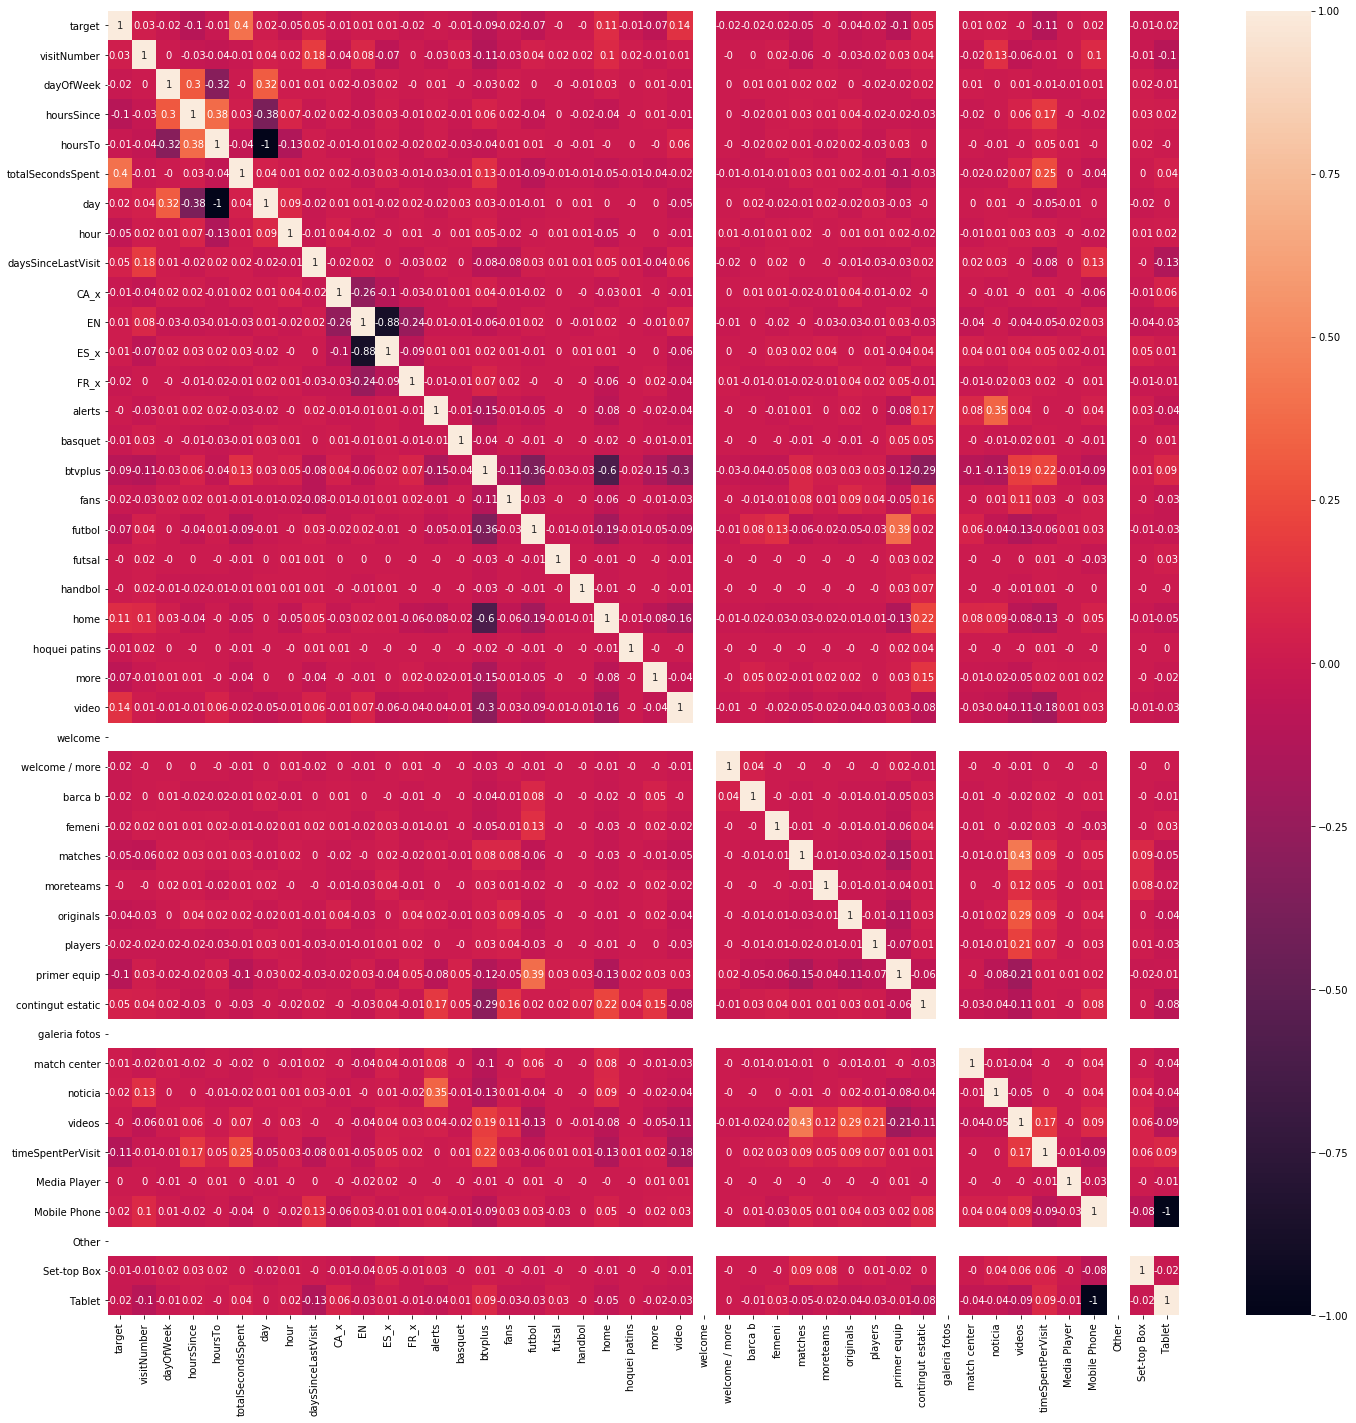

In [36]:
plt.figure(figsize=(24, 24))
sns.heatmap(round(df_sessions[sessions_columns1].corr(), 2), annot=True)
df_sessions.corr()

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
target,1.000000,0.025585,-0.019340,-0.101356,-0.014109,0.399078,0.016212,-0.054966,0.053253,-0.011140,...,0.000409,0.000882,-0.004247,-0.004455,-0.001833,-0.006861,0.002687,-0.005129,0.016967,0.002056
visitNumber,0.025585,1.000000,0.001296,-0.028424,-0.041255,-0.005382,0.040733,0.018650,0.180908,-0.036670,...,-0.021184,0.075804,-0.014283,0.020278,0.006511,-0.019034,-0.008177,-0.008195,-0.008192,-0.004636
dayOfWeek,-0.019340,0.001296,1.000000,0.303276,-0.319833,-0.002799,0.320902,0.007085,0.009794,0.016076,...,-0.012189,-0.033798,-0.023440,0.012182,0.021698,0.010407,-0.009687,-0.001828,-0.015927,-0.014887
hoursSince,-0.101356,-0.028424,0.303276,1.000000,0.379716,0.026354,-0.383958,0.071537,-0.024856,0.022204,...,0.008967,-0.001802,-0.009078,-0.016638,0.012867,0.005564,-0.004583,0.006257,-0.008123,-0.012999
hoursTo,-0.014109,-0.041255,-0.319833,0.379716,1.000000,-0.043031,-0.999320,-0.130228,0.018250,-0.007714,...,0.006074,0.033013,0.024112,-0.020586,-0.011995,0.011556,-0.014640,0.011484,0.019378,-0.008220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobile ios 13.6.1,-0.006861,-0.019034,0.010407,0.005564,0.011556,-0.006003,-0.011207,-0.010668,0.014834,-0.006347,...,-0.007425,-0.007757,-0.006531,-0.006101,-0.005867,1.000000,-0.004350,-0.001345,-0.002508,-0.003400
mobile ios 13.3.1,0.002687,-0.008177,-0.009687,-0.004583,-0.014640,0.026127,0.014180,0.014015,0.010920,-0.010944,...,-0.007092,-0.007408,-0.006237,-0.005827,-0.005604,-0.004350,1.000000,-0.001284,-0.002396,-0.003247
android 6.0.1,-0.005129,-0.008195,-0.001828,0.006257,0.011484,-0.005601,-0.010839,-0.018635,0.000673,-0.003383,...,-0.002192,-0.002290,-0.001928,-0.001801,-0.001732,-0.001345,-0.001284,1.000000,-0.000740,-0.001004
mobile ios 12.4.9,0.016967,-0.008192,-0.015927,-0.008123,0.019378,-0.004101,-0.019280,-0.004805,-0.011872,0.036879,...,-0.004089,-0.004271,-0.003596,-0.003359,-0.003231,-0.002508,-0.002396,-0.000740,1.000000,-0.001872


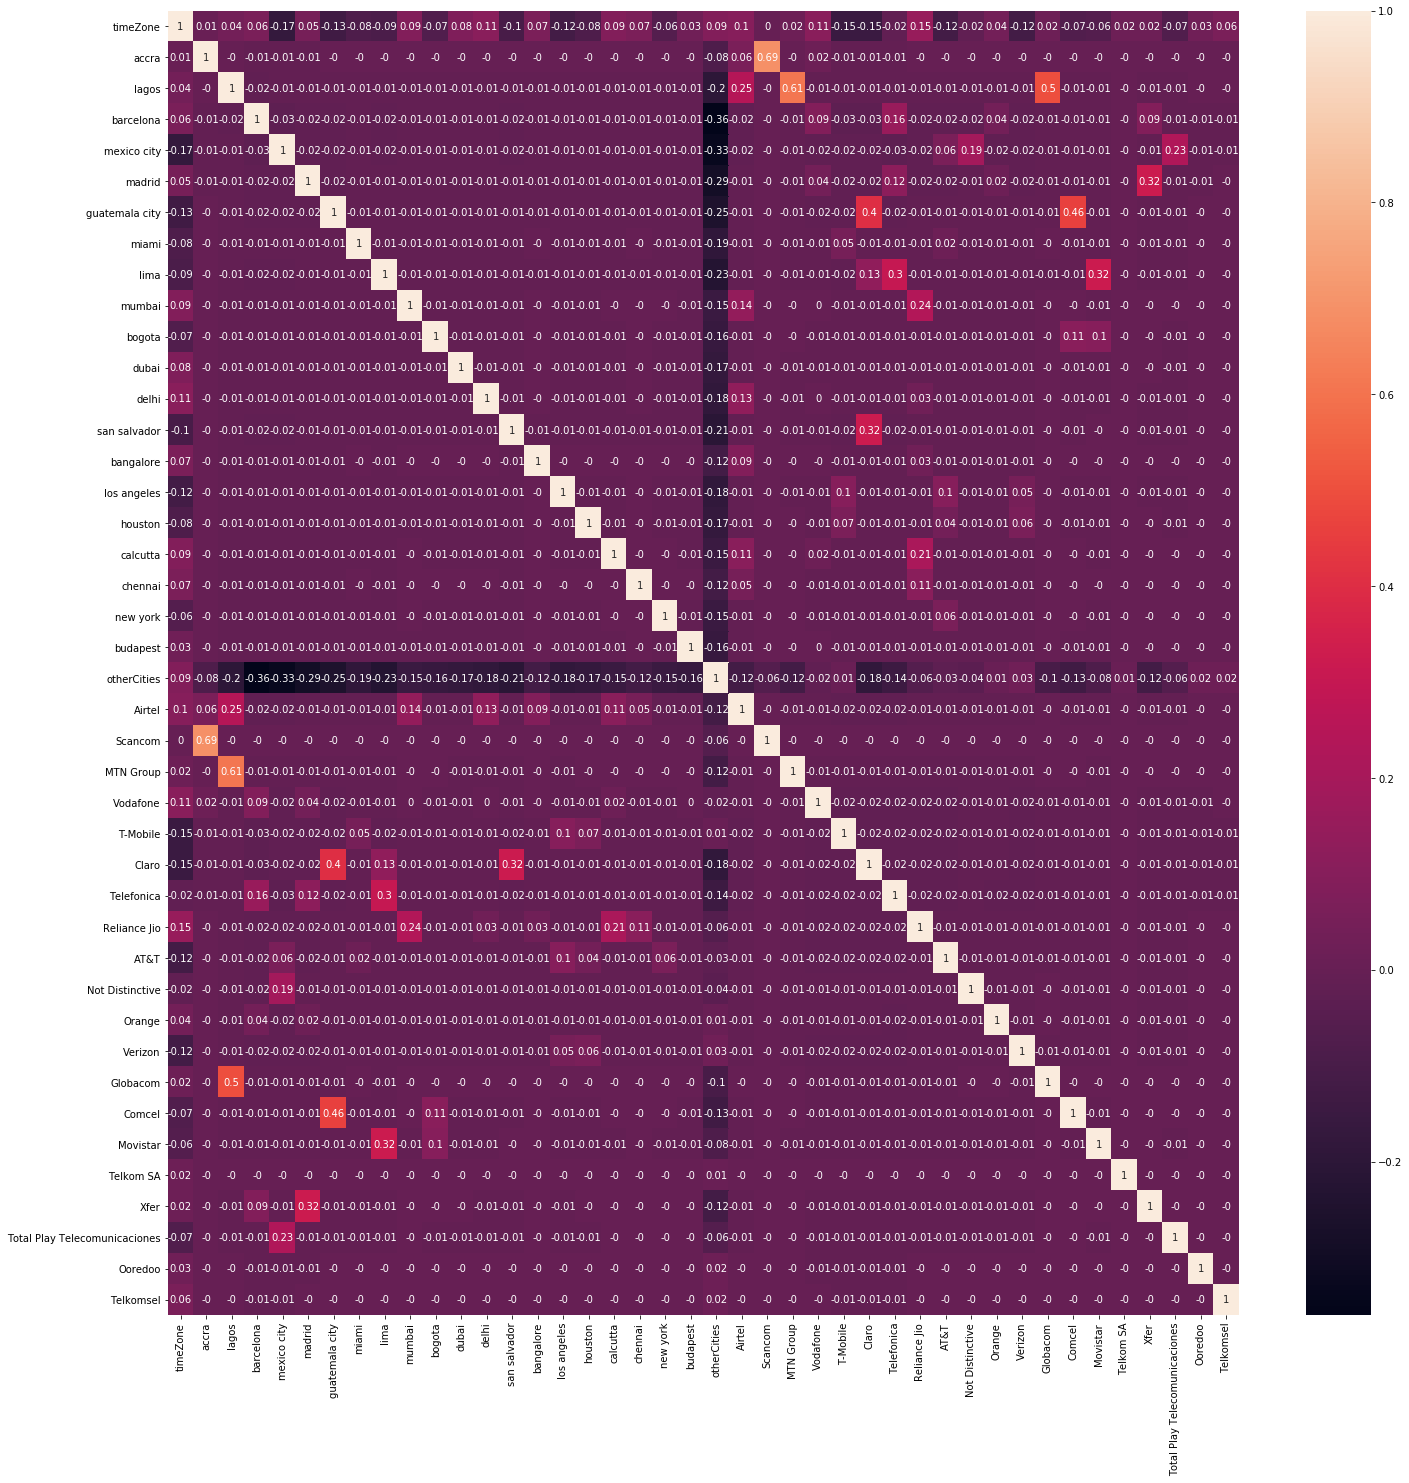

In [39]:
plt.figure(figsize=(24, 24))
sns.heatmap(round(df_sessions[sessions_columns2].corr(), 2), annot=True)
df_sessions.corr()

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,day,hour,daysSinceLastVisit,CA_x,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
target,1.000000,0.025585,-0.019340,-0.101356,-0.014109,0.399078,0.016212,-0.054966,0.053253,-0.011140,...,0.000409,0.000882,-0.004247,-0.004455,-0.001833,-0.006861,0.002687,-0.005129,0.016967,0.002056
visitNumber,0.025585,1.000000,0.001296,-0.028424,-0.041255,-0.005382,0.040733,0.018650,0.180908,-0.036670,...,-0.021184,0.075804,-0.014283,0.020278,0.006511,-0.019034,-0.008177,-0.008195,-0.008192,-0.004636
dayOfWeek,-0.019340,0.001296,1.000000,0.303276,-0.319833,-0.002799,0.320902,0.007085,0.009794,0.016076,...,-0.012189,-0.033798,-0.023440,0.012182,0.021698,0.010407,-0.009687,-0.001828,-0.015927,-0.014887
hoursSince,-0.101356,-0.028424,0.303276,1.000000,0.379716,0.026354,-0.383958,0.071537,-0.024856,0.022204,...,0.008967,-0.001802,-0.009078,-0.016638,0.012867,0.005564,-0.004583,0.006257,-0.008123,-0.012999
hoursTo,-0.014109,-0.041255,-0.319833,0.379716,1.000000,-0.043031,-0.999320,-0.130228,0.018250,-0.007714,...,0.006074,0.033013,0.024112,-0.020586,-0.011995,0.011556,-0.014640,0.011484,0.019378,-0.008220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobile ios 13.6.1,-0.006861,-0.019034,0.010407,0.005564,0.011556,-0.006003,-0.011207,-0.010668,0.014834,-0.006347,...,-0.007425,-0.007757,-0.006531,-0.006101,-0.005867,1.000000,-0.004350,-0.001345,-0.002508,-0.003400
mobile ios 13.3.1,0.002687,-0.008177,-0.009687,-0.004583,-0.014640,0.026127,0.014180,0.014015,0.010920,-0.010944,...,-0.007092,-0.007408,-0.006237,-0.005827,-0.005604,-0.004350,1.000000,-0.001284,-0.002396,-0.003247
android 6.0.1,-0.005129,-0.008195,-0.001828,0.006257,0.011484,-0.005601,-0.010839,-0.018635,0.000673,-0.003383,...,-0.002192,-0.002290,-0.001928,-0.001801,-0.001732,-0.001345,-0.001284,1.000000,-0.000740,-0.001004
mobile ios 12.4.9,0.016967,-0.008192,-0.015927,-0.008123,0.019378,-0.004101,-0.019280,-0.004805,-0.011872,0.036879,...,-0.004089,-0.004271,-0.003596,-0.003359,-0.003231,-0.002508,-0.002396,-0.000740,1.000000,-0.001872


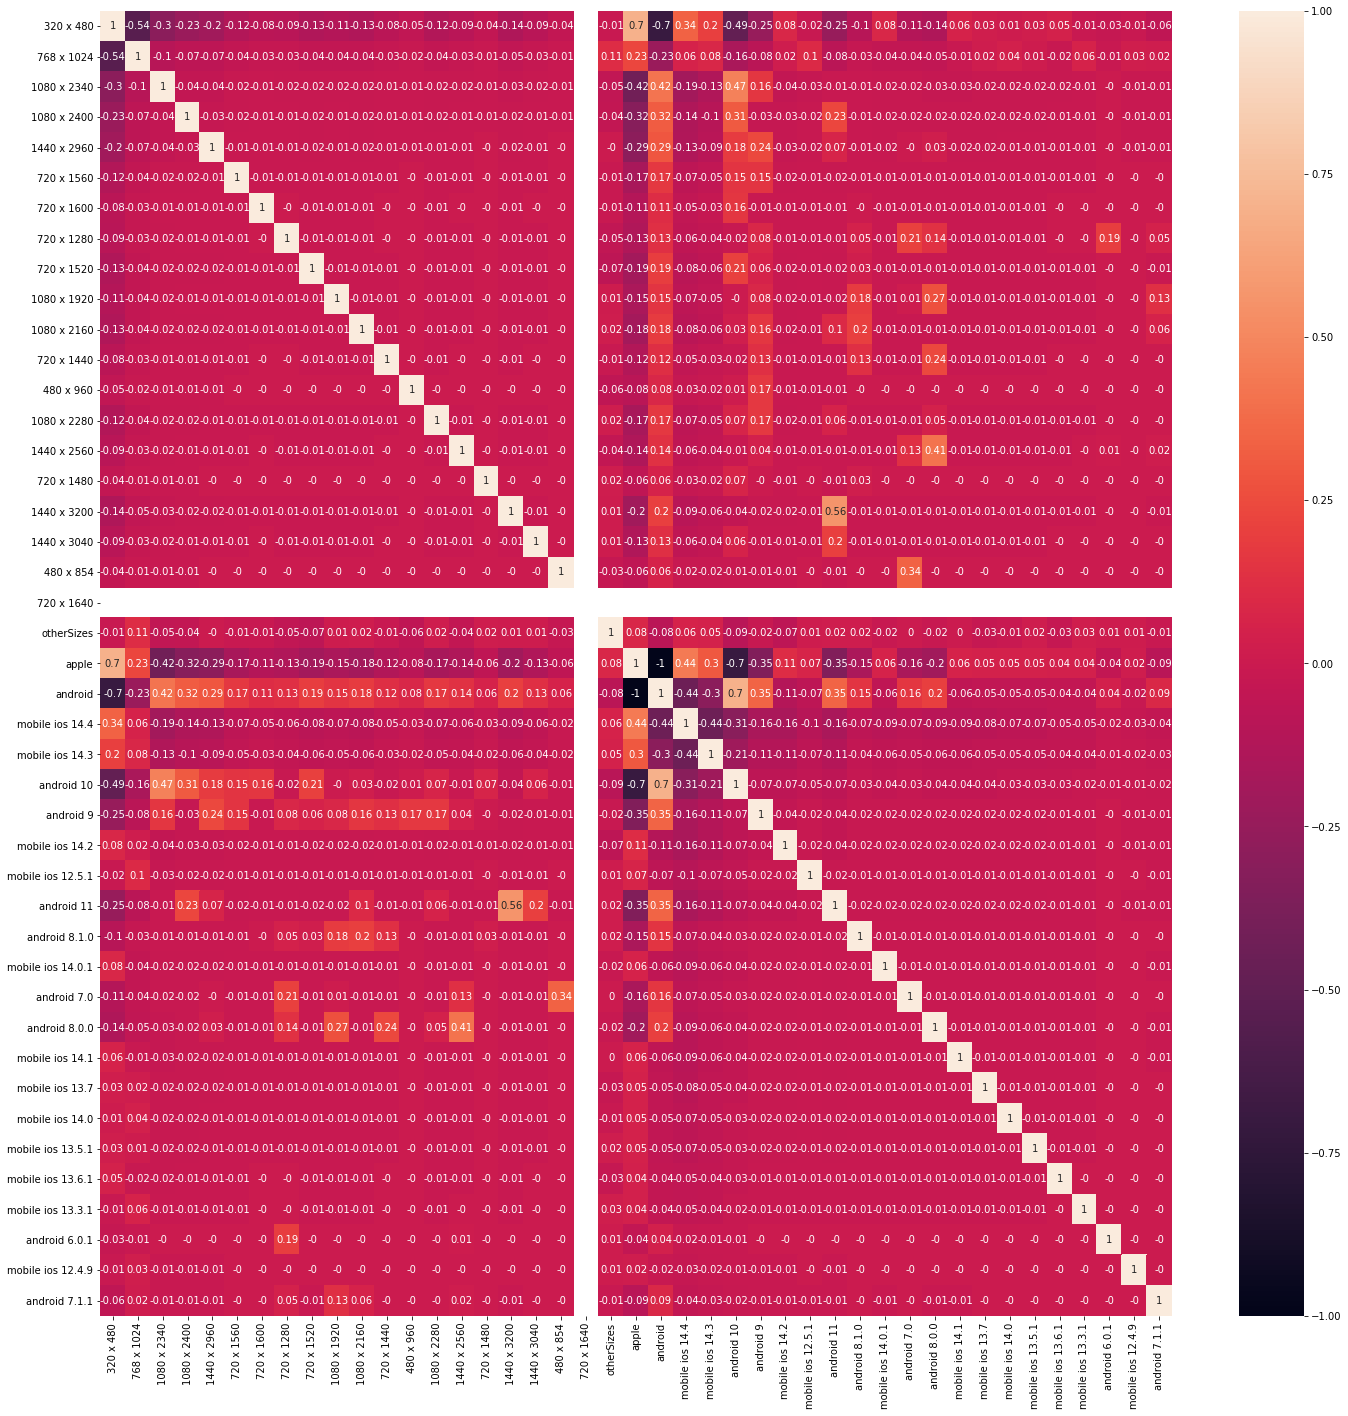

In [41]:
plt.figure(figsize=(24, 24))
sns.heatmap(round(df_sessions[sessions_columns3].corr(), 2), annot=True)
df_sessions.corr()

In [42]:
session_columns = [
#'userId',
#'hourOfDay',
#'year',
#'month',
'target',
'visitNumber',
'dayOfWeek',
'hoursSince',
'hoursTo',
'totalSecondsSpent',
#'day',
'hour',
'daysSinceLastVisit',
'CA_x',
#'EN',
'ES_x',
'FR_x',
'alerts',
'basquet',
'btvplus',
'fans',
'futbol',
'futsal',
'handbol',
'home',
'hoquei patins',
'more',
'video',
'welcome',
'welcome / more',
'barca b',
'femeni',
'matches',
'moreteams',
'originals',
'players',
'primer equip',
'contingut estatic',
'galeria fotos',
'match center',
'noticia',
'videos',
'timeSpentPerVisit',
'Media Player',
'Mobile Phone',
'Other',
'Set-top Box',
#'Tablet',
'timeZone',
'accra',
'lagos',
'barcelona',
'mexico city',
'madrid',
'guatemala city',
'miami',
'lima',
'mumbai',
'bogota',
'dubai',
'delhi',
'san salvador',
'bangalore',
'los angeles',
'houston',
'calcutta',
'chennai',
'new york',
'budapest',
'otherCities',
'Airtel',
#'Scancom',
'MTN Group',
'Vodafone',
'T-Mobile',
'Claro',
'Telefonica',
'Reliance Jio',
'AT&T',
'Not Distinctive',
'Orange',
'Verizon',
'Globacom',
'Comcel',
'Movistar',
'Telkom SA',
'Xfer',
'Total Play Telecomunicaciones',
'Ooredoo',
'Telkomsel',
#'320 x 480',
'768 x 1024',
'1080 x 2340',
'1080 x 2400',
'1440 x 2960',
'720 x 1560',
'720 x 1600',
'720 x 1280',
'720 x 1520',
'1080 x 1920',
'1080 x 2160',
'720 x 1440',
'480 x 960',
'1080 x 2280',
'1440 x 2560',
'720 x 1480',
'1440 x 3200',
'1440 x 3040',
'480 x 854',
'720 x 1640',
'otherSizes',
'apple',
#'android',
'mobile ios 14.4',
'mobile ios 14.3',
'android 10',
'android 9',
'mobile ios 14.2',
'mobile ios 12.5.1',
'android 11',
'android 8.1.0',
'mobile ios 14.0.1',
'android 7.0',
'android 8.0.0',
'mobile ios 14.1',
'mobile ios 13.7',
'mobile ios 14.0',
'mobile ios 13.5.1',
'mobile ios 13.6.1',
'mobile ios 13.3.1',
'android 6.0.1',
'mobile ios 12.4.9',
'android 7.1.1'
]
df_sessions_clean = df_sessions[session_columns]
df_sessions_clean = df_sessions_clean.drop_duplicates()

In [43]:
df_sessions_clean.index.name = 'sessionId'

In [44]:
df_sessions_clean

,target,visitNumber,dayOfWeek,hoursSince,hoursTo,totalSecondsSpent,hour,daysSinceLastVisit,CA_x,ES_x,...,android 8.0.0,mobile ios 14.1,mobile ios 13.7,mobile ios 14.0,mobile ios 13.5.1,mobile ios 13.6.1,mobile ios 13.3.1,android 6.0.1,mobile ios 12.4.9,android 7.1.1
sessionId,,,,,,,,,,,,,,,,,,,,,
0,1,34,0,4,812,180,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,0,4,812,14,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,34,0,4,812,18,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,34,0,4,812,3,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34,0,4,812,5,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64730,1,28,6,31,141,99,23,3,0,0,...,0,0,0,0,0,0,0,0,0,0
64731,0,25,6,31,141,351,23,0,0,1,...,0,0,0,0,0,0,0,0,0,0
64732,0,25,6,31,141,1,23,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
seed = 42

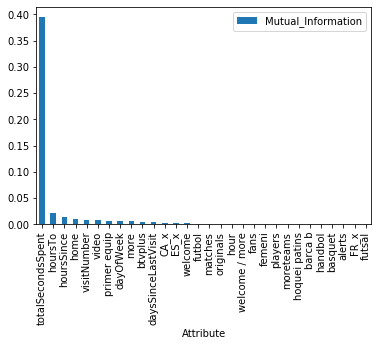

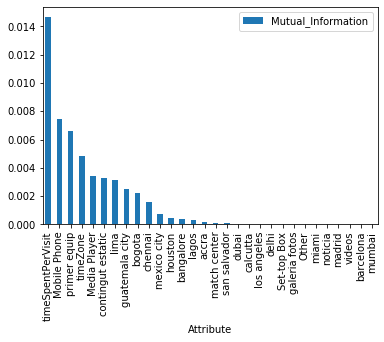

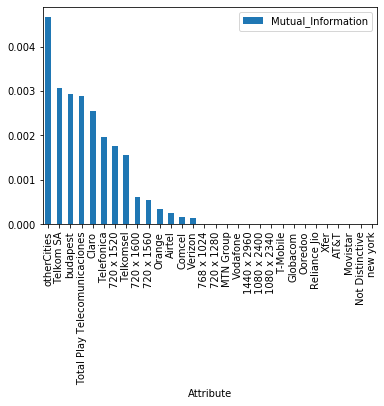

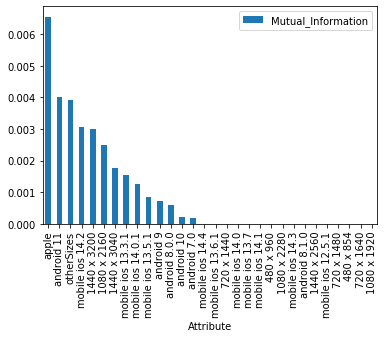

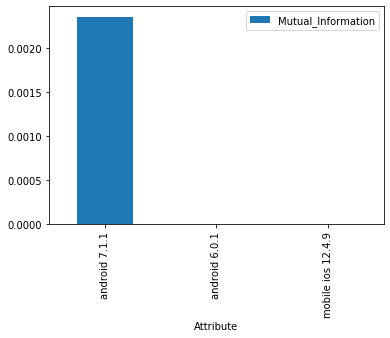

In [46]:
y = df_sessions_clean.to_numpy()[:,0].astype('int')
from_column = 1
for from_column in [1, 30, 60, 90, 120]:
  to_column = from_column + 30
  X = df_sessions_clean.to_numpy()[:,from_column:to_column]
  mic = mutual_info_classif(X, y, random_state=seed)
  columns = df_sessions_clean.columns[from_column:to_column]
  mic_df = pd.DataFrame({'Attribute':df_sessions_clean.columns[from_column:to_column], 'Mutual_Information':mic}).sort_values(by="Mutual_Information", ascending=False)
  mic_df.plot('Attribute', 'Mutual_Information', kind='bar')
  plt.show()
  #mic_df

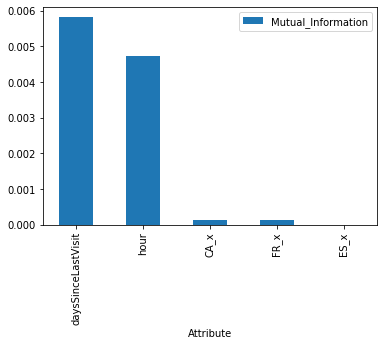

In [47]:
y = df_sessions_clean.to_numpy()[:,0].astype('int')
X = df_sessions_clean.to_numpy()[:,6:11]
mic = mutual_info_classif(X, y, random_state=seed)
columns = df_sessions_clean.columns[6:11]
mic_df = pd.DataFrame({'Attribute':df_sessions_clean.columns[6:11], 'Mutual_Information':mic}).sort_values(by="Mutual_Information", ascending=False)
mic_df.plot('Attribute', 'Mutual_Information', kind='bar')
plt.show()

In [48]:
session_columns = [
##'userId',
##'hourOfDay',
##'year',
##'month',
'target',
'visitNumber',
'dayOfWeek',
'hoursSince',
'hoursTo',
#'totalSecondsSpent',
##'day',
'hour',
'daysSinceLastVisit',
'CA_x',
##'EN',
'ES_x',
'FR_x',
'alerts',
'basquet',
'btvplus',
'fans',
'futbol',
'futsal',
'handbol',
'home',
'hoquei patins',
'more',
'video',
'welcome',
'welcome / more',
'barca b',
'femeni',
'matches',
'moreteams',
'originals',
'players',
'primer equip',
'contingut estatic',
'galeria fotos',
'match center',
'noticia',
'videos',
'timeSpentPerVisit',
'Media Player',
'Mobile Phone',
'Other',
'Set-top Box',
##'Tablet',
'timeZone',
#'accra',
#'lagos',
#'mexico city',
#'madrid',
#'barcelona',
#'guatemala city',
#'lima',
#'miami',
#'mumbai',
#'bogota',
#'dubai',
#'delhi',
#'san salvador',
#'bangalore',
#'los angeles',
#'houston',
#'calcutta',
#'chennai',
#'new york',
#'budapest',
'otherCities',
#'Airtel',
##'Scancom',
#'MTN Group',
#'Vodafone',
#'T-Mobile',
#'Claro',
#'Telefonica',
#'Reliance Jio',
#'AT&T',
#'Not Distinctive',
#'Orange',
#'Verizon',
#'Comcel',
#'Globacom',
#'Movistar',
#'Telkom SA',
#'Xfer',
#'Total Play Telecomunicaciones',
#'Ooredoo',
#'Telkomsel',
#'320 x 480',
#'768 x 1024',
#'1080 x 2340',
#'1080 x 2400',
#'1440 x 2960',
#'720 x 1560',
#'720 x 1600',
#'720 x 1280',
#'720 x 1520',
#'1080 x 1920',
#'1080 x 2160',
#'720 x 1440',
#'480 x 960',
#'1080 x 2280',
#'1440 x 2560',
#'720 x 1480',
#'1440 x 3200',
#'1440 x 3040',
#'720 x 1640',
#'480 x 854',
'otherSizes',
'apple',
##'android',
#'mobile ios 14.4',
#'mobile ios 14.3',
#'android 10',
#'android 9',
#'mobile ios 14.2',
#'mobile ios 12.5.1',
#'android 11',
#'android 8.1.0',
#'mobile ios 14.0.1',
#'android 7.0',
#'android 8.0.0',
#'mobile ios 14.1',
#'mobile ios 13.7',
#'mobile ios 14.0',
#'mobile ios 13.5.1',
#'mobile ios 13.6.1',
#'mobile ios 13.3.1',
#'android 6.0.1',
#'mobile ios 12.4.9',
#'android 7.1.1'
]
df_sessions_clean = df_sessions[session_columns]
df_sessions_clean = df_sessions_clean.drop_duplicates()

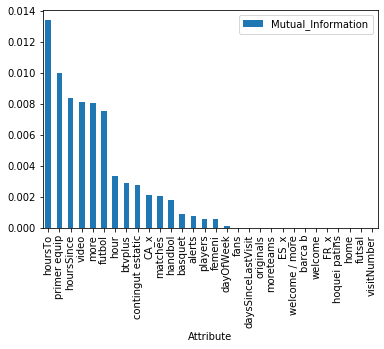

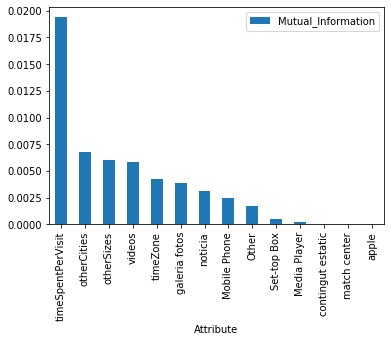

In [49]:
y = df_sessions_clean.to_numpy()[:,0].astype('int')
from_column = 1
for from_column in [1, 30]:
  to_column = from_column + 30
  X = df_sessions_clean.to_numpy()[:,from_column:to_column]
  mic = mutual_info_classif(X, y, random_state=seed)
  columns = df_sessions_clean.columns[from_column:to_column]
  mic_df = pd.DataFrame({'Attribute':df_sessions_clean.columns[from_column:to_column], 'Mutual_Information':mic}).sort_values(by="Mutual_Information", ascending=False)
  mic_df.plot('Attribute', 'Mutual_Information', kind='bar')
  plt.show()
  #mic_df

In [50]:
session_columns = [
##'userId',
##'hourOfDay',
##'year',
##'month',
'target',
#'visitNumber',
'dayOfWeek',
'hoursSince',
'hoursTo',
#'totalSecondsSpent',
##'day',
#'hour',
'daysSinceLastVisit',
#'CA_x',
##'EN',
'ES_x',
#'FR_x',
#'alerts',
#'basquet',
#'btvplus',
#'fans',
#'futbol',
#'futsal',
#'handbol',
'home',
#'hoquei patins',
'more',
'video',
#'welcome',
#'welcome / more',
#'barca b',
#'femeni',
#'matches',
#'moreteams',
#'originals',
#'players',
'primer equip',
#'contingut estatic',
#'galeria fotos',
##'match center',
#'noticia',
#'videos',
'timeSpentPerVisit',
#'Media Player',
'Mobile Phone',
#'Other',
#'Set-top Box',
##'Tablet',
'timeZone',
#'accra',
#'lagos',
#'mexico city',
#'madrid',
#'barcelona',
#'guatemala city',
#'lima',
#'miami',
#'mumbai',
#'bogota',
#'dubai',
#'delhi',
#'san salvador',
#'bangalore',
#'los angeles',
#'houston',
#'calcutta',
#'chennai',
#'new york',
#'budapest',
'otherCities',
#'Airtel',
##'Scancom',
#'MTN Group',
#'Vodafone',
#'T-Mobile',
#'Claro',
#'Telefonica',
#'Reliance Jio',
#'AT&T',
#'Not Distinctive',
#'Orange',
#'Verizon',
#'Comcel',
#'Globacom',
#'Movistar',
#'Telkom SA',
#'Xfer',
#'Total Play Telecomunicaciones',
#'Ooredoo',
#'Telkomsel',
#'320 x 480',
#'768 x 1024',
#'1080 x 2340',
#'1080 x 2400',
#'1440 x 2960',
#'720 x 1560',
#'720 x 1600',
#'720 x 1280',
#'720 x 1520',
#'1080 x 1920',
#'1080 x 2160',
#'720 x 1440',
#'480 x 960',
#'1080 x 2280',
#'1440 x 2560',
#'720 x 1480',
#'1440 x 3200',
#'1440 x 3040',
#'720 x 1640',
#'480 x 854',
'otherSizes',
'apple',
##'android',
#'mobile ios 14.4',
#'mobile ios 14.3',
#'android 10',
#'android 9',
#'mobile ios 14.2',
#'mobile ios 12.5.1',
#'android 11',
#'android 8.1.0',
#'mobile ios 14.0.1',
#'android 7.0',
#'android 8.0.0',
#'mobile ios 14.1',
#'mobile ios 13.7',
#'mobile ios 14.0',
#'mobile ios 13.5.1',
#'mobile ios 13.6.1',
#'mobile ios 13.3.1',
#'android 6.0.1',
#'mobile ios 12.4.9',
#'android 7.1.1'
]
df_sessions_clean = df_sessions[session_columns]
df_sessions_clean = df_sessions_clean.drop_duplicates()

In [51]:
df_sessions_clean

,target,dayOfWeek,hoursSince,hoursTo,daysSinceLastVisit,ES_x,home,more,video,primer equip,timeSpentPerVisit,Mobile Phone,timeZone,otherCities,otherSizes,apple
0,1,0,4,812,7,0,0,0,0,1,4,1,13.0,1,0,1
1,0,0,4,812,7,0,0,0,0,1,4,1,13.0,1,0,1
7,0,0,4,812,7,0,0,0,0,1,3,1,13.0,1,1,1
8,1,0,4,812,7,0,0,0,0,1,3,1,13.0,1,1,1
9,0,0,4,812,7,0,1,0,0,0,3,1,13.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64725,0,6,31,141,3,0,1,0,0,0,3,1,7.0,0,1,1
64726,1,6,31,141,3,0,1,0,0,0,3,1,7.0,0,1,1
64727,0,6,31,141,3,0,0,0,0,0,3,1,7.0,0,1,1
64731,0,6,31,141,0,1,0,0,0,0,3,1,13.0,1,1,1


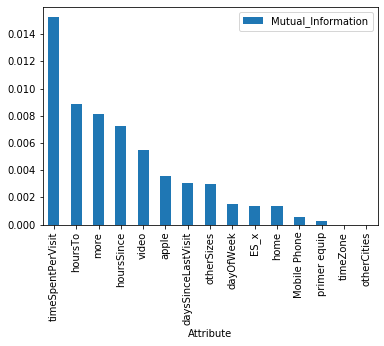

In [52]:
from_column = 1
to_column = 50
X = df_sessions_clean.to_numpy()[:,from_column:to_column]
y = df_sessions_clean.to_numpy()[:,0].astype('int')
mic = mutual_info_classif(X, y, random_state=seed)
columns = df_sessions_clean.columns[from_column:to_column]
mic_df = pd.DataFrame({'Attribute':df_sessions_clean.columns[from_column:to_column], 'Mutual_Information':mic}).sort_values(by="Mutual_Information", ascending=False)
mic_df.plot('Attribute', 'Mutual_Information', kind='bar')
plt.show()
#mic_df

In [53]:
df_sessions_clean.to_csv('sessions_clean.csv', index=True)

## Fans

In [5]:
df_fans = pd.read_csv('fans_numerico.csv')
df_fans

,userId,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,FFA_TIME_ON_BARCATV,ENG,SPA,CAT,FRA,JAP,ARA,otherLanguages,F,M,userAge,US,ES,IN,MX,NG,GB,GH,FR,CA,CO,NL,GT,DE,SE,ZA,PE,ID,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,WEB,subscriptor
0,barcafans-50b1b048-3075-445e-ac88-f54c17a4a665,2,9,1.0,0.0,0,3.0,0.0,1,0,0,0,0,0,0,0,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.549370e+09,1.578682e+09,1.585936e+09,1.609583e+09,0,1,0
1,barcafans-39fbdac7-3276-4713-9006-9af6f3f5a245,2,20,3.0,0.0,0,88.0,0.0,1,0,0,0,0,0,0,0,1,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.538698e+09,1.613557e+09,1.585937e+09,1.613725e+09,0,1,0
2,barcafans-c35449a8-9a0d-4278-8082-aaac144048f8,2,10,3.0,0.0,0,158.0,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.526256e+09,1.549498e+09,1.585937e+09,1.609583e+09,0,1,0
3,barcafans-46a0cca9-61ae-415f-96af-5cb635e742c8,2,9,1.0,1.0,0,3.0,0.0,1,0,0,0,0,0,0,0,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.551678e+09,1.607535e+09,1.585938e+09,1.613491e+09,0,1,0
4,barcafans-cd6758db-1b67-4d25-a111-bb1909ea0229,2,4,3.0,0.0,0,1250.0,424.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.540339e+09,1.592840e+09,1.585938e+09,1.613491e+09,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,barcafans-e53c9186-a725-423f-bff7-2e24c28bfa96,9,9,1.0,1.0,0,0.0,NaN,0,1,0,0,0,0,0,0,1,43,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.613612e+09,1.613613e+09,1.613724e+09,1.613726e+09,1,0,0
32893,barcafans-f71df868-0b56-4ce9-b236-e944dd90a516,9,9,2.0,0.0,0,0.0,NaN,1,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.613672e+09,1.613672e+09,1.613724e+09,1.613726e+09,1,0,0
32894,barcafans-f8094f39-90e1-4aea-a873-812a2537a5d2,9,9,1.0,1.0,0,0.0,NaN,1,0,0,0,0,0,0,0,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.613656e+09,1.613656e+09,1.613724e+09,1.613726e+09,0,1,0
32895,barcafans-fb6a9f4c-cc09-46e0-bb83-9cbfd92820ff,9,9,1.0,1.0,0,0.0,NaN,1,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.613616e+09,1.613617e+09,1.613724e+09,1.613726e+09,0,1,0


,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,FFA_TIME_ON_BARCATV,ENG,SPA,CAT,FRA,JAP,ARA,otherLanguages,F,M,userAge,US,ES,IN,MX,NG,GB,GH,FR,CA,CO,NL,GT,DE,SE,ZA,PE,ID,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,WEB,subscriptor
FFA_FIRST_SOURCE_ID,1.000000,0.654646,0.243809,-0.034707,-0.034182,-0.007268,-0.004270,-0.034239,0.000664,0.062749,-0.011203,-0.003457,0.005412,-0.003036,0.056255,-0.013626,0.055546,0.012980,-0.010852,0.000251,-0.000923,0.005611,-0.007223,0.005512,-0.005181,-0.004791,0.001805,0.003748,0.016567,-0.000296,0.005038,-0.001999,0.007719,0.015644,-0.002514,0.001458,-0.014722,-0.009152,-0.154319,0.003769,-0.191229,-0.022995,-0.026765,0.026765,-0.022181
FFA_LAST_SOURCE_ID,0.654646,1.000000,0.379757,-0.020616,-0.010318,-0.000432,-0.007897,-0.024190,-0.002294,0.053919,-0.018959,-0.005490,-0.000955,0.004346,0.060360,-0.069720,0.079590,0.001752,-0.011985,0.001789,-0.000123,-0.000019,0.005338,-0.001603,-0.001607,0.002438,-0.000969,0.010435,0.005444,0.001884,0.005439,-0.000552,0.012720,0.007221,0.002562,0.013769,-0.007164,-0.006585,-0.189580,-0.064115,-0.172889,-0.039439,-0.086170,0.086170,-0.035060
FFA_FSB_ID,0.243809,0.379757,1.000000,-0.062263,0.031364,0.048854,0.025165,-0.178533,0.021304,0.298757,-0.054619,-0.018698,0.009284,0.002268,0.233498,0.177323,0.102389,-0.008752,0.069851,-0.023367,0.035826,-0.028669,-0.003492,-0.046630,-0.005268,0.009610,0.017792,0.002924,0.016476,0.004998,0.015312,-0.010882,0.012356,-0.002989,0.001990,0.028459,0.007914,-0.033852,-0.650132,-0.340736,-0.224968,-0.080634,-0.497415,0.497415,0.103306
FFA_EMAIL_STATUS_ACTIVO,-0.034707,-0.020616,-0.062263,1.000000,0.002909,0.050730,0.044883,-0.012298,0.011780,-0.010716,0.027431,0.003416,0.007635,0.004474,-0.020729,0.056257,-0.031872,-0.022242,0.019008,-0.011222,-0.000604,0.023193,0.000979,0.031966,0.011303,0.015986,-0.003807,0.013501,-0.001585,0.020415,0.006766,0.008572,-0.001059,-0.002368,0.000154,0.006346,0.005135,-0.030510,0.140197,0.223164,0.189867,0.120082,-0.023932,0.023932,0.075849
FFA_VIP,-0.034182,-0.010318,0.031364,0.002909,1.000000,0.001446,-0.002667,0.002856,-0.000137,-0.005081,0.001440,-0.001705,-0.000297,-0.000727,0.003024,0.008135,-0.009058,-0.000736,-0.005481,-0.011300,0.017376,-0.011472,-0.004525,-0.010353,0.001105,0.002279,-0.006309,0.003952,-0.000661,0.011370,-0.005426,-0.005384,0.006450,0.000705,0.000909,0.007440,0.014162,0.006957,-0.035549,0.002619,-0.037965,-0.008747,-0.032131,0.032131,0.030236
FFA_TIME_ON_PLATORM,-0.007268,-0.000432,0.048854,0.050730,0.001446,1.000000,0.689668,-0.045036,0.034349,0.029025,-0.013030,0.027588,-0.001997,-0.003301,0.064381,0.148305,0.043278,-0.014238,0.051568,-0.019179,0.023157,-0.010371,0.008572,-0.032793,-0.000242,0.009598,0.003255,-0.004272,0.001600,0.021719,0.007270,0.000174,0.008197,-0.015482,0.000389,-0.006025,0.004740,-0.017575,-0.054677,0.032759,-0.108541,-0.010555,-0.128227,0.128227,0.287673
FFA_TIME_ON_BARCATV,-0.004270,-0.007897,0.025165,0.044883,-0.002667,0.689668,1.000000,-0.019853,0.014849,0.013912,-0.014017,0.029906,NaN,-0.002414,0.047323,0.127041,0.022777,0.014429,0.026812,-0.014247,0.020610,-0.021503,0.006544,-0.025758,0.000337,0.005575,-0.006668,-0.006337,-0.000189,0.008833,-0.006243,0.001364,0.004396,-0.012392,0.015027,-0.002463,0.004909,-0.017541,-0.017071,0.067799,-0.025421,0.034525,-0.112781,0.112781,0.288057
ENG,-0.034239,-0.024190,-0.178533,-0.012298,0.002856,-0.045036,-0.019853,1.000000,-0.764233,-0.458064,-0.210512,-0.049925,-0.008687,-0.021280,-0.039866,-0.122773,-0.166571,0.091356,-0.407543,0.127209,-0.236959,0.117184,0.106067,0.108701,-0.077759,0.050704,-0.110921,0.054932,-0.109255,0.038019,0.046486,0.054003,-0.090737,0.054390,0.055275,0.041577,-0.002931,0.117931,0.175686,0.091188,0.112603,0.049502,0.212100,-0.212100,-0.093894
SPA,0.000664,-0.002294,0.021304,0.011780,-0.000137,0.034349,0.014849,-0.764233,1.000000,-0.141027,-0.064812,-0.015371,-0.002674,-0.006551,0.04

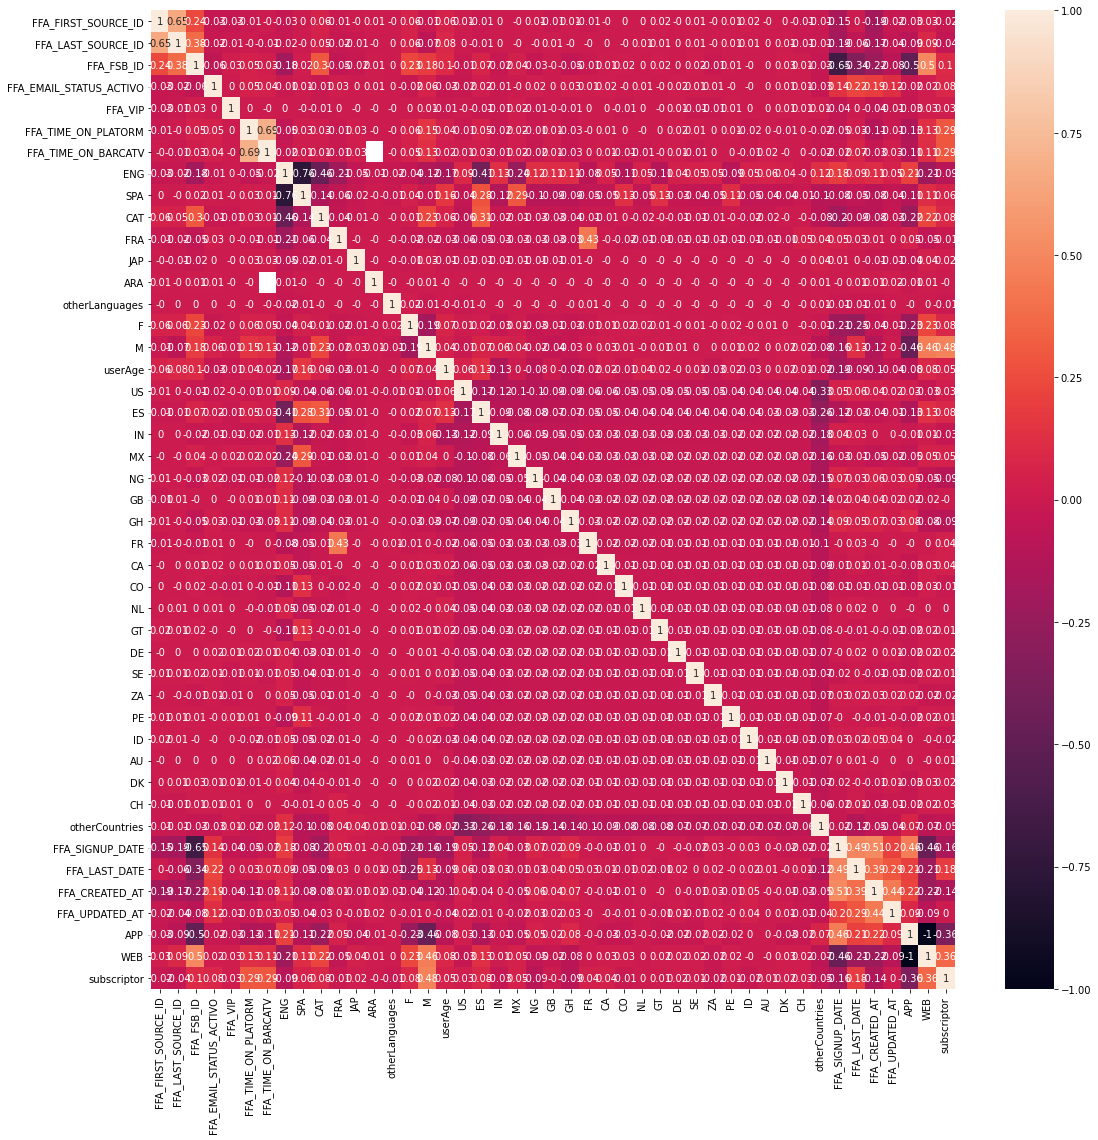

In [6]:
plt.figure(figsize=(18, 18))
sns.heatmap(round(df_fans.corr(), 2), annot=True)
df_fans.corr()

In [7]:
df_fans.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['userId', 'FFA_FIRST_SOURCE_ID', 'FFA_LAST_SOURCE_ID', 'FFA_FSB_ID',
       'FFA_EMAIL_STATUS_ACTIVO', 'FFA_VIP', 'FFA_TIME_ON_PLATORM',
       'FFA_TIME_ON_BARCATV', 'ENG', 'SPA', 'CAT', 'FRA', 'JAP', 'ARA',
       'otherLanguages', 'F', 'M', 'userAge', 'US', 'ES', 'IN', 'MX', 'NG',
       'GB', 'GH', 'FR', 'CA', 'CO', 'NL', 'GT', 'DE', 'SE', 'ZA', 'PE', 'ID',
       'AU', 'DK', 'CH', 'otherCountries', 'FFA_SIGNUP_DATE', 'FFA_LAST_DATE',
       'FFA_CREATED_AT', 'FFA_UPDATED_AT', 'APP', 'WEB', 'subscriptor'],
      dtype='object')>

In [13]:
fans_columns = ['userId',
                'FFA_FIRST_SOURCE_ID',
                'FFA_LAST_SOURCE_ID',
                'FFA_FSB_ID',
       'FFA_EMAIL_STATUS_ACTIVO',
       'FFA_VIP',
       'FFA_TIME_ON_PLATORM',
       #'FFA_TIME_ON_BARCATV',
       #'ENG',
       'SPA',
       'CAT',
       'FRA',
       'JAP',
       'ARA',
       'otherLanguages',
       'F',
       'M',
       'userAge',
       'US',
       'ES',
       'IN',
       'MX',
       'NG',
       'GB',
       'GH',
       'FR',
       'CA',
       'CO',
       'NL',
       'GT',
       'DE',
       'SE',
       'ZA',
       'PE',
       'ID',
       'AU',
       'DK',
       'CH',
       'otherCountries',
       'FFA_SIGNUP_DATE',
       'FFA_LAST_DATE',
       'FFA_CREATED_AT',
       'FFA_UPDATED_AT',
       'APP',
       #'WEB',
       'subscriptor']
df_fans_clean = df_fans[fans_columns]
df_fans_clean = df_fans_clean.drop_duplicates()
df_fans_clean

,userId,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,SPA,CAT,FRA,JAP,ARA,otherLanguages,F,M,userAge,US,ES,IN,MX,NG,GB,GH,FR,CA,CO,NL,GT,DE,SE,ZA,PE,ID,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,subscriptor
0,barcafans-50b1b048-3075-445e-ac88-f54c17a4a665,2,9,1.0,0.0,0,3.0,0,0,0,0,0,0,0,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.549370e+09,1.578682e+09,1.585936e+09,1.609583e+09,0,0
1,barcafans-39fbdac7-3276-4713-9006-9af6f3f5a245,2,20,3.0,0.0,0,88.0,0,0,0,0,0,0,0,1,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.538698e+09,1.613557e+09,1.585937e+09,1.613725e+09,0,0
2,barcafans-c35449a8-9a0d-4278-8082-aaac144048f8,2,10,3.0,0.0,0,158.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.526256e+09,1.549498e+09,1.585937e+09,1.609583e+09,0,0
3,barcafans-46a0cca9-61ae-415f-96af-5cb635e742c8,2,9,1.0,1.0,0,3.0,0,0,0,0,0,0,0,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.551678e+09,1.607535e+09,1.585938e+09,1.613491e+09,0,0
4,barcafans-cd6758db-1b67-4d25-a111-bb1909ea0229,2,4,3.0,0.0,0,1250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.540339e+09,1.592840e+09,1.585938e+09,1.613491e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,barcafans-e53c9186-a725-423f-bff7-2e24c28bfa96,9,9,1.0,1.0,0,0.0,1,0,0,0,0,0,0,1,43,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.613612e+09,1.613613e+09,1.613724e+09,1.613726e+09,1,0
32893,barcafans-f71df868-0b56-4ce9-b236-e944dd90a516,9,9,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.613672e+09,1.613672e+09,1.613724e+09,1.613726e+09,1,0
32894,barcafans-f8094f39-90e1-4aea-a873-812a2537a5d2,9,9,1.0,1.0,0,0.0,0,0,0,0,0,0,0,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.613656e+09,1.613656e+09,1.613724e+09,1.613726e+09,0,0
32895,barcafans-fb6a9f4c-cc09-46e0-bb83-9cbfd92820ff,9,9,1.0,1.0,0,0.0,0,0,0,0,0,0,0,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.613616e+09,1.613617e+09,1.613724e+09,1.613726e+09,0,0


,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,SPA,CAT,FRA,JAP,ARA,otherLanguages,F,M,userAge,US,ES,IN,MX,NG,GB,GH,FR,CA,CO,NL,GT,DE,SE,ZA,PE,ID,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,subscriptor
FFA_FIRST_SOURCE_ID,1.000000,0.654646,0.243809,-0.034707,-0.034182,-0.007268,0.000664,0.062749,-0.011203,-0.003457,0.005412,-0.003036,0.056255,-0.013626,0.055546,0.012980,-0.010852,0.000251,-0.000923,0.005611,-0.007223,0.005512,-0.005181,-0.004791,0.001805,0.003748,0.016567,-0.000296,0.005038,-0.001999,0.007719,0.015644,-0.002514,0.001458,-0.014722,-0.009152,-0.154319,0.003769,-0.191229,-0.022995,-0.026765,-0.022181
FFA_LAST_SOURCE_ID,0.654646,1.000000,0.379757,-0.020616,-0.010318,-0.000432,-0.002294,0.053919,-0.018959,-0.005490,-0.000955,0.004346,0.060360,-0.069720,0.079590,0.001752,-0.011985,0.001789,-0.000123,-0.000019,0.005338,-0.001603,-0.001607,0.002438,-0.000969,0.010435,0.005444,0.001884,0.005439,-0.000552,0.012720,0.007221,0.002562,0.013769,-0.007164,-0.006585,-0.189580,-0.064115,-0.172889,-0.039439,-0.086170,-0.035060
FFA_FSB_ID,0.243809,0.379757,1.000000,-0.062263,0.031364,0.048854,0.021304,0.298757,-0.054619,-0.018698,0.009284,0.002268,0.233498,0.177323,0.102389,-0.008752,0.069851,-0.023367,0.035826,-0.028669,-0.003492,-0.046630,-0.005268,0.009610,0.017792,0.002924,0.016476,0.004998,0.015312,-0.010882,0.012356,-0.002989,0.001990,0.028459,0.007914,-0.033852,-0.650132,-0.340736,-0.224968,-0.080634,-0.497415,0.103306
FFA_EMAIL_STATUS_ACTIVO,-0.034707,-0.020616,-0.062263,1.000000,0.002909,0.050730,0.011780,-0.010716,0.027431,0.003416,0.007635,0.004474,-0.020729,0.056257,-0.031872,-0.022242,0.019008,-0.011222,-0.000604,0.023193,0.000979,0.031966,0.011303,0.015986,-0.003807,0.013501,-0.001585,0.020415,0.006766,0.008572,-0.001059,-0.002368,0.000154,0.006346,0.005135,-0.030510,0.140197,0.223164,0.189867,0.120082,-0.023932,0.075849
FFA_VIP,-0.034182,-0.010318,0.031364,0.002909,1.000000,0.001446,-0.000137,-0.005081,0.001440,-0.001705,-0.000297,-0.000727,0.003024,0.008135,-0.009058,-0.000736,-0.005481,-0.011300,0.017376,-0.011472,-0.004525,-0.010353,0.001105,0.002279,-0.006309,0.003952,-0.000661,0.011370,-0.005426,-0.005384,0.006450,0.000705,0.000909,0.007440,0.014162,0.006957,-0.035549,0.002619,-0.037965,-0.008747,-0.032131,0.030236
FFA_TIME_ON_PLATORM,-0.007268,-0.000432,0.048854,0.050730,0.001446,1.000000,0.034349,0.029025,-0.013030,0.027588,-0.001997,-0.003301,0.064381,0.148305,0.043278,-0.014238,0.051568,-0.019179,0.023157,-0.010371,0.008572,-0.032793,-0.000242,0.009598,0.003255,-0.004272,0.001600,0.021719,0.007270,0.000174,0.008197,-0.015482,0.000389,-0.006025,0.004740,-0.017575,-0.054677,0.032759,-0.108541,-0.010555,-0.128227,0.287673
SPA,0.000664,-0.002294,0.021304,0.011780,-0.000137,0.034349,1.000000,-0.141027,-0.064812,-0.015371,-0.002674,-0.006551,0.042957,-0.012152,0.163372,-0.042878,0.276852,-0.122924,0.291032,-0.103405,-0.090023,-0.092062,-0.048322,-0.047746,0.131235,-0.048341,0.132114,-0.034069,-0.040370,-0.048528,0.112605,-0.046116,-0.044417,-0.042158,-0.011670,-0.098791,-0.081281,-0.053378,-0.076803,-0.040323,-0.105680,0.057605
CAT,0.062749,0.053919,0.298757,-0.010716,-0.005081,0.029025,-0.141027,1.000000,-0.038847,-0.009213,-0.001603,-0.003927,0.014941,0.233412,0.058219,-0.059909,0.305990,-0.016861,-0.010792,-0.031394,-0.033454,-0.035148,-0.010930,-0.014060,0.003176,-0.015952,-0.001463,-0.009382,-0.012269,-0.013060,-0.004968,-0.017477,-0.021584,-0.001972,-0.000830,-0.078993,-0.200078,-0.090709,-0.083411,-0.026420,-0.222969,0.078214
FRA,-0.011203,-0.018959,-0.054619,0.027431,0.001440,-0.013030,-0.064812,-0.038847,1.000000,-0.004234,-0.000737,-0.001805,-0.021204,-0.023014,-0.031355,-0.060017,-0.045020,-0.033949,-0.029761,-0.028483,-0.026155,-0.025704,0.434413,-0.002050,-0.015664,-0.011092,-0.014635,-0.009021,-0.013471,-0.013367,-0.013053,-0.012925,-0.012688,-0.012313,0.047541,0.037919,0.045033,0.030305,0.014719,0.0

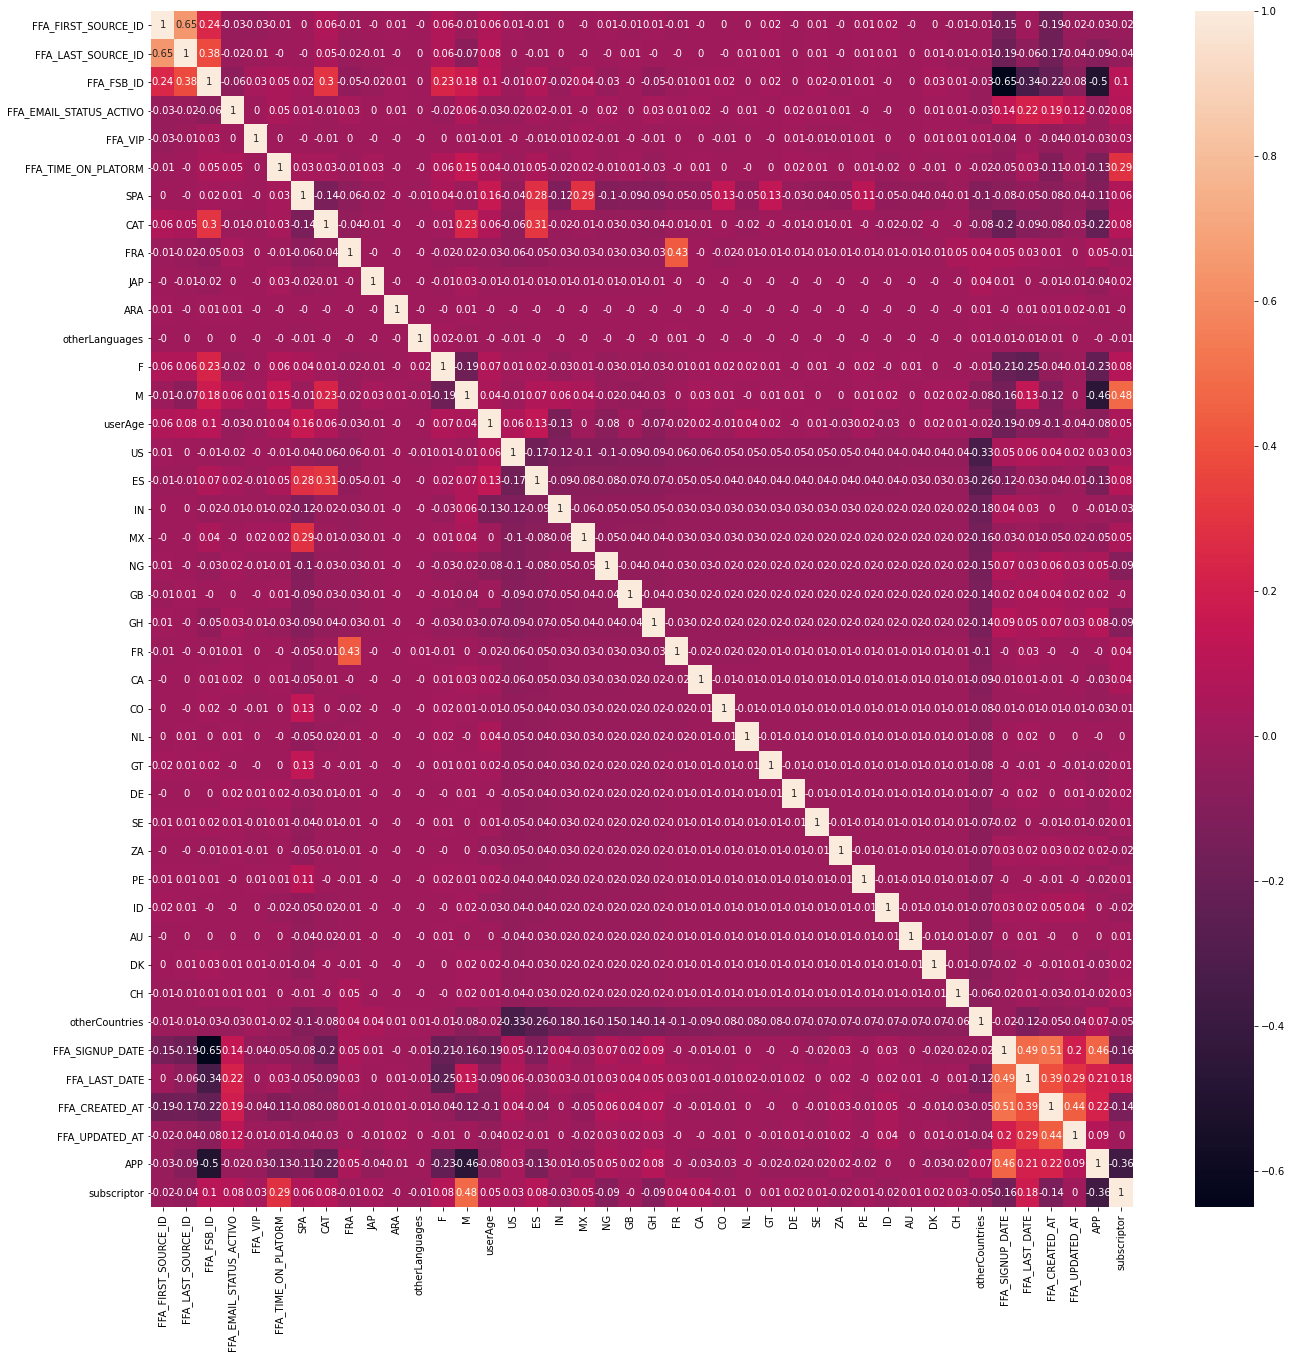

In [16]:
plt.figure(figsize=(22, 22))
sns.heatmap(round(df_fans_clean.corr(), 2), annot=True)
df_fans_clean.corr()

In [18]:
df_fans_clean.to_csv('fans_clean.csv', index=True) 